# Markov Chain Monte Carlo
## Unknown Variance

This notebook walks through how to implement a simple markov chain monte carlo analysis using Metropolis hastings for a model where both mean and
variance is unknown.

MCMC analysis searches some N-Dimensional space for some mode of a distribution. The process is as follows:

1) Choose Random Start mean and standard deviation, $\theta_0$, $\sigma_0$. 

2) At step i = 1,..,N, propose a new parameter $\theta_i,\sigma_i$ which is drawn from some distribution with a mean theta_i, and covariance matrix Sigma, where:

$$\Sigma = \begin{bmatrix} \tau_\theta^2 & 0 \\ 0 & \tau_\sigma^2 \end{bmatrix}$$

$\tau_\theta^2$ and $\tau_\sigma^2$ are chosen to suit the model and space being fit to. (Trial and error)

3) Evaluate the ratio:

$$r = \frac{P(\theta_i, \sigma_i | y)}{P(\theta_{i-1},\sigma_{i-1} | y)}$$

4) Accept $\theta_p$ with some probability.

5) Repeat steps 2-4 until you converge.

The posterior distribution being evaluated in this case is:

$$P(\mu,\sigma^2 | y) \propto (\sigma^2)^{-(n+2)/2} \exp{\Bigg[\frac{-1}{2\sigma^2}\Big[\big(n-1\big)s^2 + n\big(\bar{y}-u\big)^2}\Big] \Bigg]$$

It can be seen from the 

In [2]:
import numpy
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

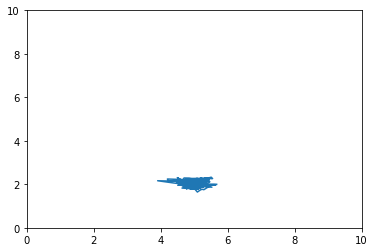

In [110]:
#Statistics of space we are searching
meanx=5
sigmax = 2
Nx = 100

#Number of markov chain steps
n_mc = 1000

#Proposal Scales
tau_mu = 0.6
tau_sigma = 0.1

#For applying random noise
proposal_covariance = numpy.asarray([[numpy.square(tau_mu),0],[0,numpy.square(tau_sigma)]])
proposal_covariance = proposal_covariance/1
cholesky = numpy.linalg.cholesky(proposal_covariance)

markov_chain = numpy.zeros((n_mc,2))
markov_chain[0] = [5.67,2]
 
acceptances = 0

#The raw posterior
def posterior_space(mean,sigma,N,curr_param):
    
    cps = curr_param[1]

    p1 = numpy.power(cps,-(float(N)+2)/2)
    #print(p1)
    p2 = (N-1) * numpy.square(sigma)
    p3 = N*numpy.square(mean - curr_param[0])
    p4 = -1/(2 * cps)
    p5 = numpy.exp(p4*(p2+p3))
    #print(p5)
    return  (curr_param[1] > 0) * p1 * p5

#More numerically stable
def posterior_space_2(mean,sigma,N,curr_param):
    
    p1 = numpy.power(curr_param[1],-N+2)
    p2 = (N-1)*numpy.square(sigma)
    p3 = N * numpy.square((mean - curr_param[0]))
    p4 = (2 * numpy.square(curr_param[1]))
    
    return (curr_param[1] > 0) * p1 * numpy.exp(-1*(p2+p3)/p4)

for i in numpy.arange(n_mc-1):
    #Find value from current point in markov chain.
    current_val = markov_chain[i,:]
    
    #Propose a new value.
    proposed = current_val + numpy.dot(cholesky,numpy.random.randn(2))
    
    #Probability Density Function
    current_pdf = posterior_space_2(meanx,sigmax,Nx,current_val)
    proposed_pdf = posterior_space_2(meanx,sigmax,Nx,proposed)
    
    #Find Ratio
    r = proposed_pdf / current_pdf
    
    #If Ratio wins over random number, accept.
    #Else keep current value, advance markov chain regardless.
    rand = numpy.random.rand()
    if r > rand:
        markov_chain[i+1] = proposed
        acceptances += 1
    else:
        markov_chain[i+1] = current_val
        
fig = plt.figure()
ax = fig.add_subplot(111)

x = markov_chain[:,0]
y = markov_chain[:,1]

line = Line2D(x,y)
ax.add_line(line)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
plt.show()